In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
zoo = pd.read_csv("zoo.csv")
class_type = pd.read_csv("class.csv")

In [3]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
zoo.rename(columns = {'class_type':'Class_Number'}, inplace = True)

In [5]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Class_Number
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
class_type.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [7]:
main = zoo.merge(class_type, on=['Class_Number'])

Text(0.5, 1.05, 'Correlation of ZOO Features')

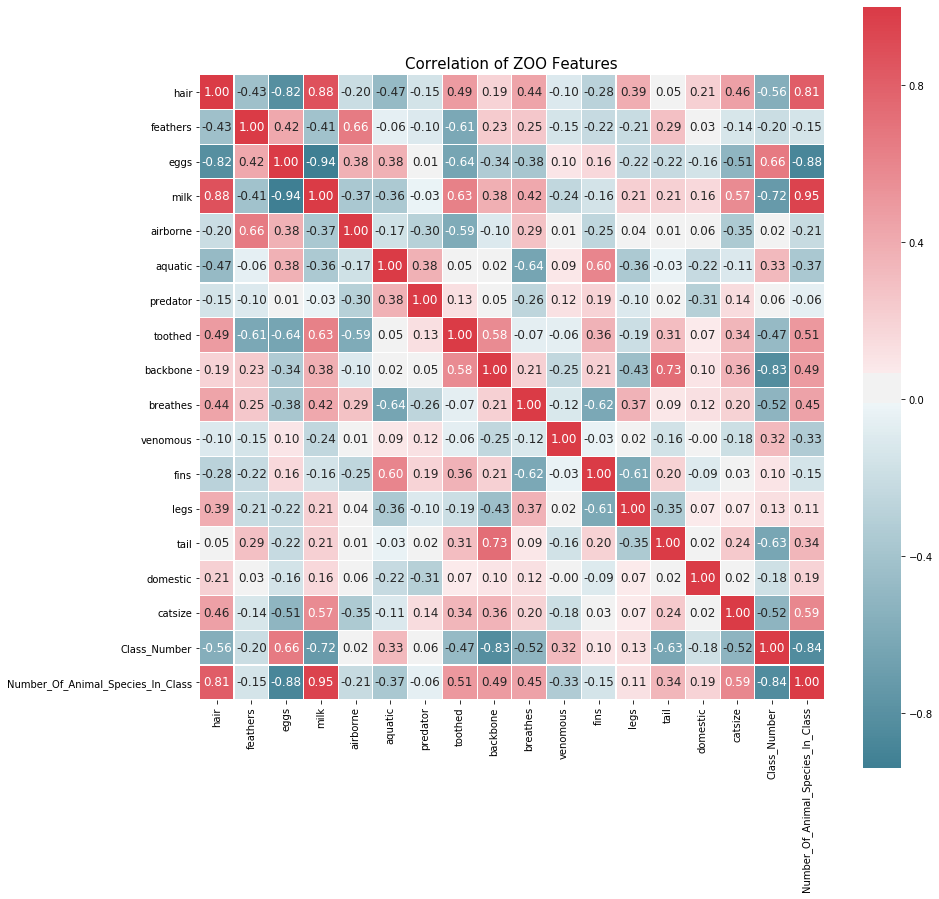

In [8]:
corr = main.iloc[:,1:-1].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of ZOO Features', y=1.05, size=15)

In [9]:
x_data = main.iloc[:,:-1]
x_data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,41,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,41,Mammal
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,41,Mammal
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,41,Mammal
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,41,Mammal


In [10]:
y_data = main.iloc[:,-1:]
y_data.head()

,Animal_Names
0,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,"aardvark, antelope, bear, boar, buffalo, calf,..."
3,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,"aardvark, antelope, bear, boar, buffalo, calf,..."


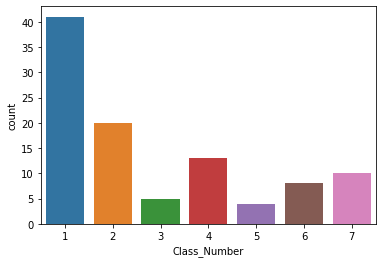

In [11]:
sns.countplot(main['Class_Number'],label="Count")

### To set up my model, I will need to break down a unique identifier.  As you can see in the data above, the 'Class_Number' column is present in both the 'zoo' and 'class_type' datasets.
* 1 is Mammal
* 2 is Bird
* 3 is Reptile
* 4 is Fish
* 5 is Amphibian

In [12]:
main.Class_Number.unique()

array([1, 4, 2, 7, 6, 5, 3])

### Identify uniqueness
#### Using the column of 'Predator', we can easily see a binary assignment of either '1' or '0' in this column per animal.  '1' would indicate a predator, while '0' would indicate that the animal is not a predator.

In [13]:
main.predator.unique()

array([1, 0])

#### We have identified the unique values for 'Class_Number' and if the animal is a predator or not.  What other unique values exist in t he data set?

In [14]:
for col in main.columns:
    print('There are {} unique variables for {}.'.format((len(main[col].unique())), col))

There are 100 unique variables for animal_name.
There are 2 unique variables for hair.
There are 2 unique variables for feathers.
There are 2 unique variables for eggs.
There are 2 unique variables for milk.
There are 2 unique variables for airborne.
There are 2 unique variables for aquatic.
There are 2 unique variables for predator.
There are 2 unique variables for toothed.
There are 2 unique variables for backbone.
There are 2 unique variables for breathes.
There are 2 unique variables for venomous.
There are 2 unique variables for fins.
There are 6 unique variables for legs.
There are 2 unique variables for tail.
There are 2 unique variables for domestic.
There are 2 unique variables for catsize.
There are 7 unique variables for Class_Number.
There are 7 unique variables for Number_Of_Animal_Species_In_Class.
There are 7 unique variables for Class_Type.
There are 7 unique variables for Animal_Names.


In [15]:
attributes = list(main.columns)
print(attributes)

['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'Class_Number', 'Number_Of_Animal_Species_In_Class', 'Class_Type', 'Animal_Names']


In [16]:
del main['animal_name']

In [17]:
del main['Animal_Names']

In [18]:
main.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,41,Mammal
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,41,Mammal
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,41,Mammal
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,41,Mammal
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,41,Mammal


In [19]:
main.dtypes

hair                                  int64
feathers                              int64
eggs                                  int64
milk                                  int64
airborne                              int64
aquatic                               int64
predator                              int64
toothed                               int64
backbone                              int64
breathes                              int64
venomous                              int64
fins                                  int64
legs                                  int64
tail                                  int64
domestic                              int64
catsize                               int64
Class_Number                          int64
Number_Of_Animal_Species_In_Class     int64
Class_Type                           object
dtype: object

In [20]:
main.drop(["Class_Type","legs","Number_Of_Animal_Species_In_Class"], axis = 1, inplace = True) 

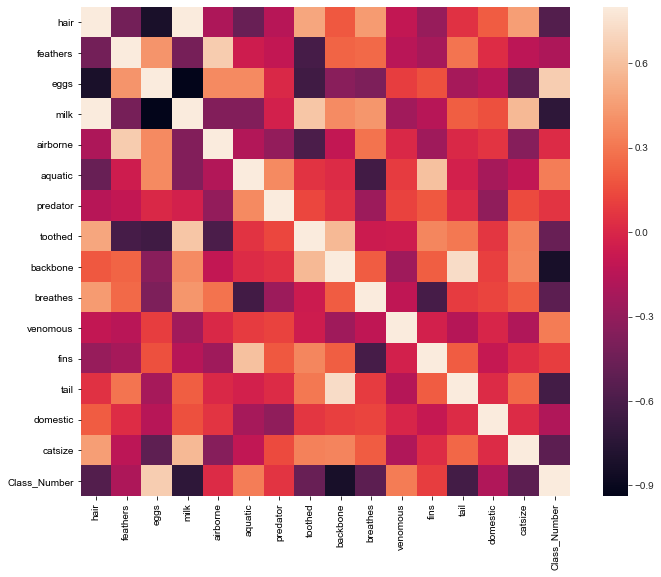

In [21]:
corrmat = main.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.set_style('darkgrid')
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [22]:
main.drop(["Class_Number","catsize"], axis = 1, inplace = True)

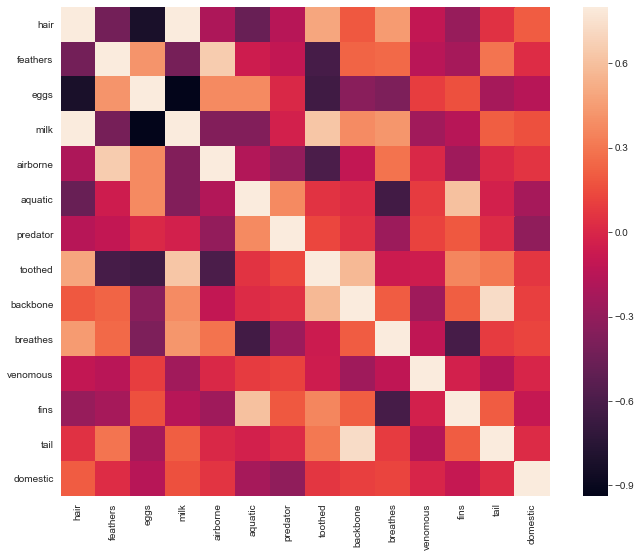

In [23]:
corrmat = main.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.set_style('darkgrid')
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [24]:
main.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,tail,domestic
0,1,0,0,1,0,0,1,1,1,1,0,0,0,0
1,1,0,0,1,0,0,0,1,1,1,0,0,1,0
2,1,0,0,1,0,0,1,1,1,1,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,1,0
4,1,0,0,1,0,0,0,1,1,1,0,0,1,0


In [25]:
main.dtypes

hair        int64
feathers    int64
eggs        int64
milk        int64
airborne    int64
aquatic     int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
fins        int64
tail        int64
domestic    int64
dtype: object

In [28]:
#Create new features
main['aquatic_predator'] = ((main.aquatic==1)&(main.predator==1)) * 1.0
main['airborne_predator'] = ((main.airborne==1)&(main.predator==1)) * 1.0
main['aquatic_non_predator']= ((main.aquatic==1)&(main.predator==0)) * 1.0
main['airborne_non_predator'] = ((main.airborne==1)&(main.predator==0)) * 1.0
main['venomous_predator'] = ((main.venomous==1)&(main.predator==1)) * 1.0
main['venomous_non_predator'] = ((main.venomous==1)&(main.predator==0)) * 1.0
main['toothed_predator'] = ((main.toothed ==1) & (main.predator==1)) * 1.0
main['toothed_non_predator'] = ((main.toothed ==1) & (main.predator==0)) * 1.0
main['domestic_predator'] = ((main.domestic==1) & (main.predator==1)) * 1.0
main['domestic_non_predator'] = ((main.domestic==1) & (main.predator==0)) * 1.0

In [29]:
main.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail',
       'domestic', 'aquatic_predator', 'airborne_predator',
       'aquatic_non_predator', 'airborne_non_predator', 'venomous_predator',
       'venomous_non_predator', 'toothed_predator', 'toothed_non_predator',
       'domestic_predator', 'domestic_non_predator'],
      dtype='object')

In [30]:
classify = pd.DataFrame()
classify = main.loc[:, ['aquatic_predator', 'airborne_predator',
       'aquatic_non_predator', 'airborne_non_predator', 'venomous_predator',
       'venomous_non_predator', 'toothed_predator', 'toothed_non_predator',
       'domestic_predator', 'domestic_non_predator']]

In [31]:
classify.columns

Index(['aquatic_predator', 'airborne_predator', 'aquatic_non_predator',
       'airborne_non_predator', 'venomous_predator', 'venomous_non_predator',
       'toothed_predator', 'toothed_non_predator', 'domestic_predator',
       'domestic_non_predator'],
      dtype='object')

In [32]:
classify.head()

,aquatic_predator,airborne_predator,aquatic_non_predator,airborne_non_predator,venomous_predator,venomous_non_predator,toothed_predator,toothed_non_predator,domestic_predator,domestic_non_predator
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
classify.dtypes

aquatic_predator         float64
airborne_predator        float64
aquatic_non_predator     float64
airborne_non_predator    float64
venomous_predator        float64
venomous_non_predator    float64
toothed_predator         float64
toothed_non_predator     float64
domestic_predator        float64
domestic_non_predator    float64
dtype: object

                       aquatic_predator  airborne_predator  \
aquatic_predator               1.000000           0.085314   
airborne_predator              0.085314           1.000000   
aquatic_non_predator          -0.173188          -0.074468   
airborne_non_predator         -0.285508          -0.122764   
venomous_predator              0.210826          -0.068580   
venomous_non_predator         -0.090205          -0.038787   
toothed_predator               0.335043          -0.207489   
toothed_non_predator          -0.354318          -0.152351   
domestic_predator             -0.090205          -0.038787   
domestic_non_predator         -0.221875          -0.095403   

                       aquatic_non_predator  airborne_non_predator  \
aquatic_predator                  -0.173188              -0.285508   
airborne_predator                 -0.074468              -0.122764   
aquatic_non_predator               1.000000               0.085625   
airborne_non_predator              0.

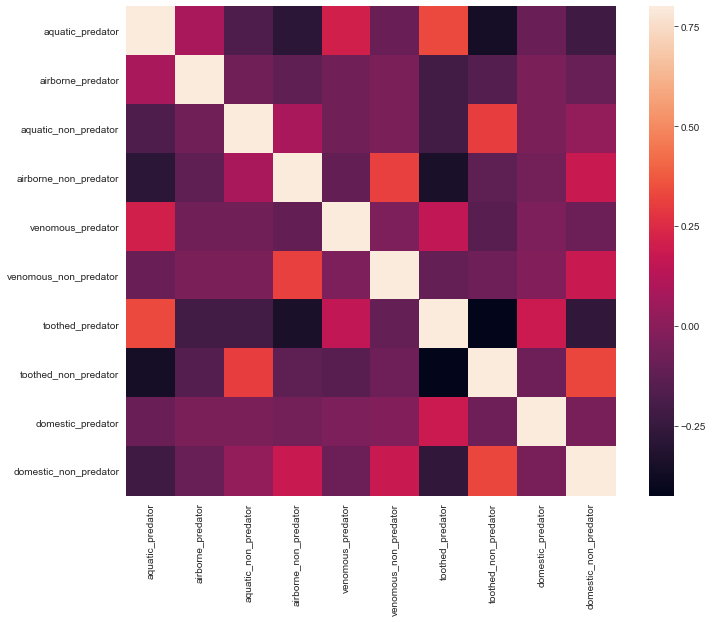

In [34]:
correlation_matrix = classify.corr()
print(correlation_matrix)

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(correlation_matrix, vmax=.8, square=True)
plt.show()

In [40]:
#We have created our new features.  Let's see if we can now use these new features and keep some of the features from the earlier versions of the database to see if we get a cleaner view.
main_clean = main.copy()
main_clean.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail',
       'domestic', 'aquatic_predator', 'airborne_predator',
       'aquatic_non_predator', 'airborne_non_predator', 'venomous_predator',
       'venomous_non_predator', 'toothed_predator', 'toothed_non_predator',
       'domestic_predator', 'domestic_non_predator'],
      dtype='object')

In [41]:
model = pd.DataFrame()
model = main_clean.loc[:, ['hair', 'feathers','toothed', 'backbone','fins', 'tail','aquatic_predator', 'airborne_predator',
       'aquatic_non_predator', 'airborne_non_predator', 'venomous_predator',
       'venomous_non_predator', 'toothed_predator', 'toothed_non_predator',
       'domestic_predator', 'domestic_non_predator']]

In [42]:
model.head()

,hair,feathers,toothed,backbone,fins,tail,aquatic_predator,airborne_predator,aquatic_non_predator,airborne_non_predator,venomous_predator,venomous_non_predator,toothed_predator,toothed_non_predator,domestic_predator,domestic_non_predator
0,1,0,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,0,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


                           hair  feathers   toothed  backbone      fins  \
hair                   1.000000 -0.427851  0.492531  0.191681 -0.280313   
feathers              -0.427851  1.000000 -0.613631  0.231403 -0.223541   
toothed                0.492531 -0.613631  1.000000  0.575085  0.364292   
backbone               0.191681  0.231403  0.575085  1.000000  0.209499   
fins                  -0.280313 -0.223541  0.364292  0.209499  1.000000   
tail                   0.048973  0.292569  0.310368  0.731762  0.204349   
aquatic_predator      -0.369415 -0.095695  0.021709 -0.047560  0.474881   
airborne_predator     -0.234966  0.451352 -0.336992  0.025215 -0.122764   
aquatic_non_predator  -0.234966  0.060051  0.061558  0.127081  0.294014   
airborne_non_predator -0.066237  0.440507 -0.447329 -0.136243 -0.202381   
venomous_predator     -0.216388 -0.124878  0.032222 -0.101863 -0.001108   
venomous_non_predator  0.165073 -0.070627 -0.175522 -0.305211 -0.063941   
toothed_predator       0.

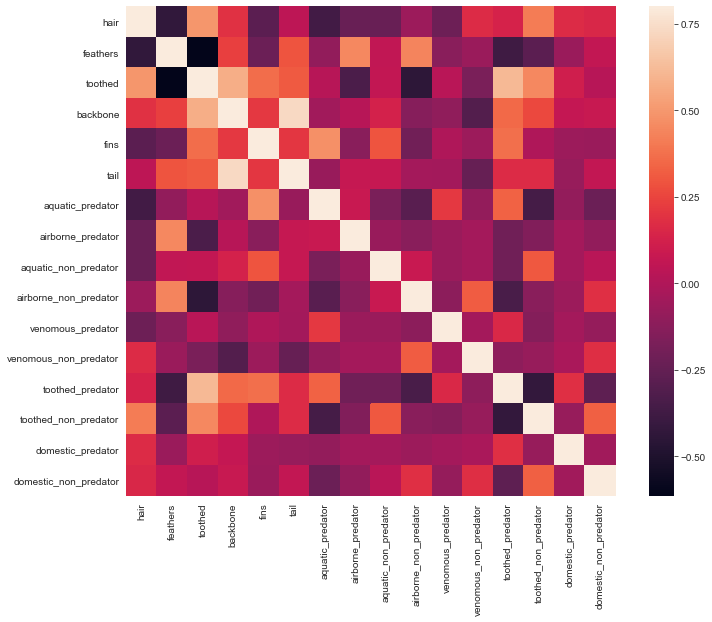

In [43]:
correlation_matrix = model.corr()
print(correlation_matrix)

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(correlation_matrix, vmax=.8, square=True)
plt.show()

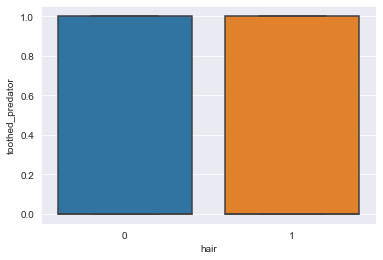

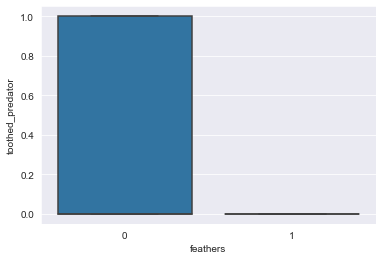

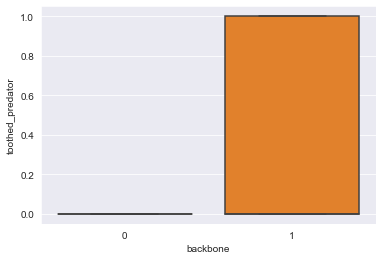

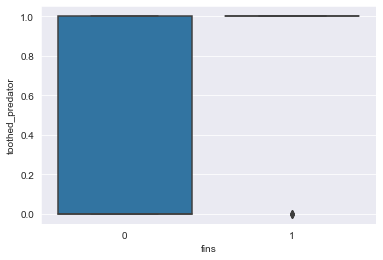

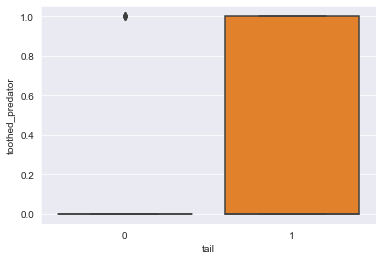

In [44]:
sns.boxplot(x = model['hair'], y = main['toothed_predator'])
plt.show()

sns.boxplot(x = main['feathers'], y = main['toothed_predator'])
plt.show()

sns.boxplot(x = main['backbone'], y = main['toothed_predator'])
plt.show()

sns.boxplot(x = main['fins'], y = main['toothed_predator'])
plt.show()

sns.boxplot(x = main['tail'], y = main['toothed_predator'])
plt.show()

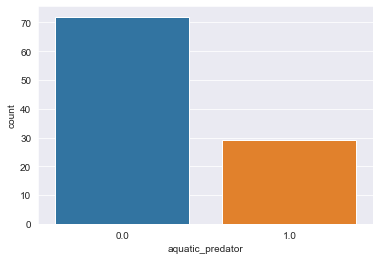

In [45]:
sns.countplot(model['aquatic_predator'],label="Count")